In [1]:
import gymnasium as gym
import numpy as np
import random
import matplotlib.pyplot as plt


In [2]:
env = gym.make("Taxi-v3", render_mode="ansi")

# Initialize Q-table (state × action)
Q = np.zeros((env.observation_space.n, env.action_space.n))

# Hyperparameters
alpha = 0.1       # learning rate
gamma = 0.9       # discount factor
epsilon = 1.0     # exploration rate
eps_decay = 0.995
eps_min = 0.01
episodes = 5000


In [3]:
#  List to store total rewards for each episode
rewards_per_episode = []

In [4]:
for episode in range(episodes):
    state, _ = env.reset()
    done = False
    total_reward = 0

    while not done:
        # ε-greedy action selection
        if random.random() < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q[state])

        # Step through environment
        next_state, reward, terminated, truncated, _ = env.step(action)
        done = terminated or truncated

        # Update Q-value
        Q[state, action] += alpha * (reward + gamma * np.max(Q[next_state]) - Q[state, action])
        state = next_state
        total_reward += reward

    #  Store total reward after each episode
    rewards_per_episode.append(total_reward)

    # Decay exploration rate
    epsilon = max(eps_min, epsilon * eps_decay)

    # Show progress occasionally
    if episode % 500 == 0:
        print(f"Episode {episode}: Total Reward = {total_reward}")

Episode 0: Total Reward = -749
Episode 500: Total Reward = -55
Episode 1000: Total Reward = 11
Episode 1500: Total Reward = 11
Episode 2000: Total Reward = -5
Episode 2500: Total Reward = 13
Episode 3000: Total Reward = 1
Episode 3500: Total Reward = 11
Episode 4000: Total Reward = 8
Episode 4500: Total Reward = 12


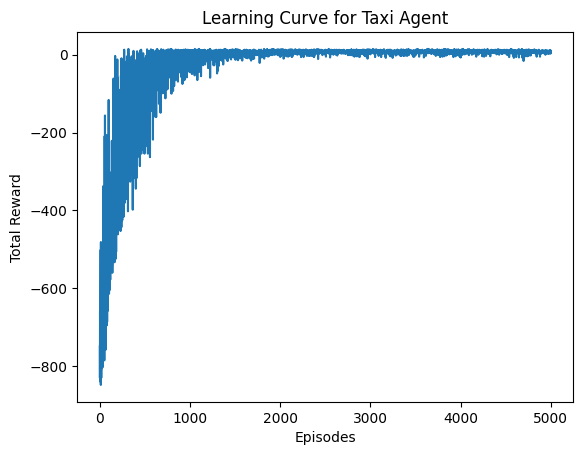


--- Testing trained agent ---


 Taxi agent training complete! Learned to pick up and drop passengers efficiently.


In [5]:
#  Plot the learning curve after training
plt.plot(rewards_per_episode)
plt.xlabel("Episodes")
plt.ylabel("Total Reward")
plt.title("Learning Curve for Taxi Agent")
plt.show()

# Testing the trained model
state, _ = env.reset()
done = False
steps = 0

print("\n--- Testing trained agent ---\n")
while not done and steps < 50:
    action = np.argmax(Q[state])
    state, reward, terminated, truncated, _ = env.step(action)
    done = terminated or truncated
    env.render()
    steps += 1

env.close()
print("\n Taxi agent training complete! Learned to pick up and drop passengers efficiently.")
